# 결정트리

결정트리는 분류와 회귀 문제에 널리 사용하는 모델

결정에 다다르기 위해 예/아니오의 질문을 이어 나가면서 학습

## 과대적합 방지
1. 사전 가지치기: 트리생성을 미리 중단
2. 트리의 최대 깊이 제한, 리프의 최대 개수 제한
3. 분할 가능한 포인트의 최소 개수 지정
4. 사후 가지치기: 트리를 만든 후 노드를 삭제하거나 병함

In [61]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from matplotlib import font_manager, rc

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

### 결정트리의 기본 세팅

In [4]:
#결정트리 기본 세팅
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=0)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트의 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트의 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트의 정확도: 1.000
테스트 세트의 정확도: 0.840


### 결정트리의 깊이 제한

In [62]:
#결정트리 깊이 제한 =4

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=0)
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트의 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트의 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트의 정확도: 0.933
테스트 세트의 정확도: 0.800


In [63]:
#결정트리 깊이 제한 =2

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=0)
tree=DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

#훈련 세트의 정확도는 깊이 제한이 4일때보다 소폭 낮아졌지만
#테스트 세트의 정확도는 그대로이다.
print("훈련 세트의 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트의 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트의 정확도: 0.920
테스트 세트의 정확도: 0.800


### 결정트리의 유방암 데이터

In [6]:
#결정트리 유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#훈련세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))

#각 트리당 max_depth는 1,4,8이다
#트리의 깊이를 제한하면 과대적합이 줄어듦
#훈련세트의 정확도를 떨어뜨리지만 테스트 세트의 정확도는 개선
for max_depth in [1,4,8]:
    #random_state=0
    tree=DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    #학습 시작
    tree.fit(X_train, y_train)
    print("max_depth={}".format(max_depth))
    print("훈련 세트의 점수: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트의 점수: {:.3f}".format(tree.score(X_test, y_test)))

X_train.shape: (426, 30) X_test.shape:(143, 30)
max_depth=1
훈련 세트의 점수: 0.923
테스트 세트의 점수: 0.923
max_depth=4
훈련 세트의 점수: 0.988
테스트 세트의 점수: 0.951
max_depth=8
훈련 세트의 점수: 1.000
테스트 세트의 점수: 0.937


In [64]:
#random_state값과 test_size를 변경해서 확인을 해보아도 
#max_depth 값이 커지면 오히려 테스트 세트의 정확도가 떨어질 수 있음을 확인할 수 있다
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=21, test_size=0.33)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))

for max_depth in [1,4,8]:
    tree=DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth={}".format(max_depth))
    print("훈련 세트의 점수: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트의 점수: {:.3f}".format(tree.score(X_test, y_test)))

X_train.shape: (381, 30) X_test.shape:(188, 30)
max_depth=1
훈련 세트의 점수: 0.932
테스트 세트의 점수: 0.904
max_depth=4
훈련 세트의 점수: 0.984
테스트 세트의 점수: 0.915
max_depth=8
훈련 세트의 점수: 0.997
테스트 세트의 점수: 0.910


In [65]:
#하지만 테스트 세트의 정확도가 꼭 줄어드는 것은 아님을 확인할 수 있다.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42, test_size=0.5)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))

for max_depth in [1,4,8]:
    tree=DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth={}".format(max_depth))
    print("훈련 세트의 점수: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트의 점수: {:.3f}".format(tree.score(X_test, y_test)))

X_train.shape: (284, 30) X_test.shape:(285, 30)
max_depth=1
훈련 세트의 점수: 0.933
테스트 세트의 점수: 0.905
max_depth=4
훈련 세트의 점수: 0.993
테스트 세트의 점수: 0.923
max_depth=8
훈련 세트의 점수: 1.000
테스트 세트의 점수: 0.930


In [9]:
#graphviz 모듈을 사용해 시각화
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

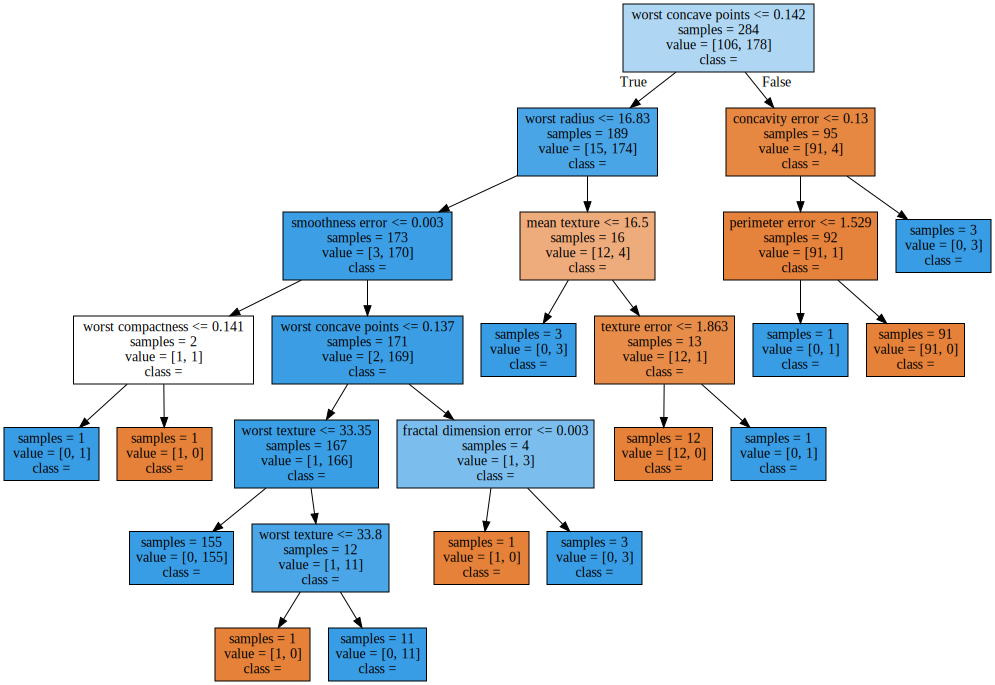

In [10]:
import graphviz
with open("tree.dot", encoding='UTF8') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 특성 중요도

In [11]:
print("특성 중요도:\n{}".format(tree.feature_importances_))
#특성의 중요도는 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가
#이 값은 0과 1 사이의 숫자
#0은 전혀 사용되지 않았다
#1은 완벽하게 타깃 클래스를 예측했다
#특성 중요도의 전체합은 1

특성 중요도:
[0.         0.03126172 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0138941
 0.01488833 0.         0.00709501 0.         0.04278436 0.
 0.         0.01128895 0.11833153 0.01496181 0.         0.
 0.         0.00752597 0.         0.73796821 0.         0.        ]


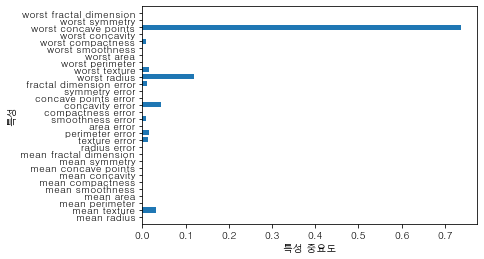

In [12]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(tree)

#특성 중요도 시각화
#worst concave points 특성이 가장 중요한 특성으로 나타남

Feature importances: [0. 1.]


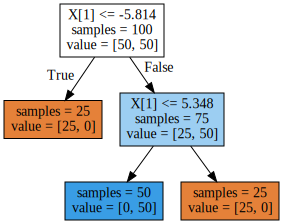

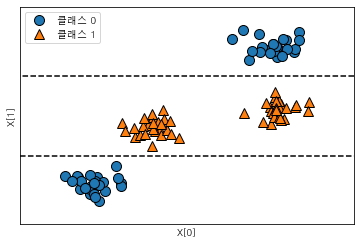

In [13]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)
#아래 그림은 y축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는
#2차원 데이터셋과 결정트리가 만든 결정 경계이다

#위 그림은 아래 그림으로 나타난 데이터로 학습한 결정트리이다.

### 결정트리회귀 vs 선형회귀
#### 램가격으로 학습

ram_prices.shape:(333, 3)
ram_prices.keys:Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격 ($/Mbyte)')

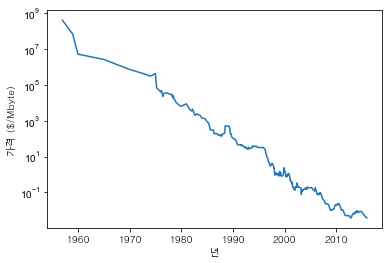

In [67]:
#램 가격
from sklearn.datasets import make_blobs
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
#ram_price.csv라는 파일을 읽어옴

print("ram_prices.shape:{}".format(ram_prices.shape))
print("ram_prices.keys:{}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

#y축은 로그 스케일
#그래프를 로그 스케일로 그리면 약간의 굴곡을 제외하면 선형적으로 나타남
#따라서 비교적 예측하기 쉬워짐

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듦
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date>=2000]

print("data_train.shape: {}".format(data_train.shape), "data_test.shape:{}".format(data_test.shape))

#가격 예측을 위해 날짝 특성만 이용
X_train = data_train.date[:, np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape: (202, 3) data_test.shape:(131, 3)


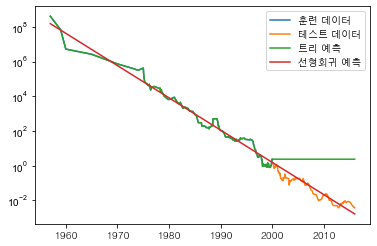

In [69]:
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

#선형모델은 직선으로 데이터를 근사하였음
#이 직선은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 매끈하게 근사하여
#테스트 데이터(2000년 이후)를 꽤 적확하게 예측함

#트리모델은 훈련 데이터를 완벽하게 예측함
#트리의 복잡도에 제한을 두지 않아써 전체 데이터셋을 모두기억하기 때문
#하지만 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는게 전부
#모든 트리 기반 모델의 공통된 단점으로, 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음
#등락의 예측에는 적용 가능하나, 시계열 데이터에 잘 맞지 않음을 알 수 있음

### 붓꽃 + Decision Tree Classifier(품종 분류)

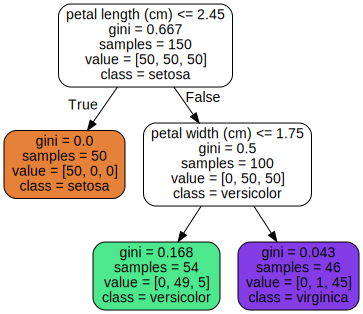

In [38]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:] #꽃의 길이와 너비
y=iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graphviz.Source.from_file("iris_tree.dot")


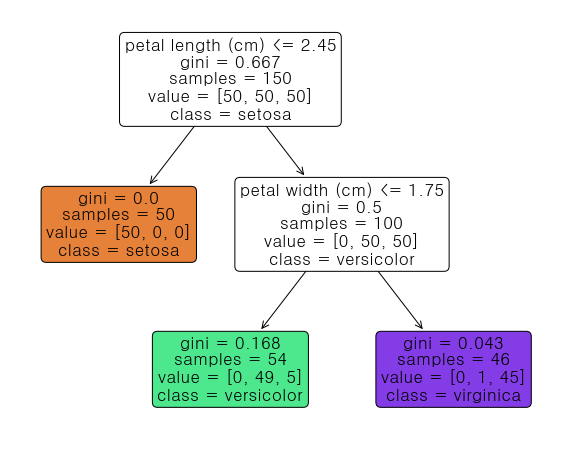

In [70]:
from sklearn.tree import plot_tree
#plot tree
#filled=True: 클래스별로 색깔 구분
#rounded = True
#max_depth = 2, 출력의 단계를 결정할 수 있다.

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded=True, max_depth=2, 
          feature_names=iris.feature_names[2:],class_names=iris.target_names)
plt.show()

# 랜덤포레스트

랜덤 포레스트와 그레이디언트 부스팅 결정 트리는 결정트리의 앙상블로, 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용함

훈련 데이터에 과대적합 되는 결정트리의 중요 단점을 회피할 수 있음

기본적으로 조금씩 다른 여러 결정 트리의 묶음

랜덤포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는데 기초함

랜덤포레스트에서 트리를 랜덤하게 만드는 방법은 두 가지임
1. 데이터 포인트를 무작위로 선택
2. 분할 테스트에서 특성을 무작위로 선택

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

#n_sample개의 데이터 포인트 중에 무작위로 데이터를 n_sample 횟수만큼 반복 추출
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
#n_estimators매개변수는 생성할 트리의 개수. scikit-learn 0.22버전부터 디폴트값은 100
forest=RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

### 랜덤포레스트 vs 결정트리

In [42]:
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=5, random_state=2)
#트리는 5개
#5개의 트리가 만든 결정 경계가 다름
#부트스트랩 샘플링으로 한 트리를 위한 훈련포인트가 다른 트리에는 포함되지 않을 수 있음
#랜덤 포레스트는 개개의 트리보다 덜 과대적합하여 더 좋은 결정 경계를 만들어줌
#많은 수의 트리를 사용하여 더 부드러운 결정 경계 생성
forest.fit(X_train,y_train)
print("테스트 세트 정확도:{:.3f}\n".format(forest.score(X_test,y_test)))

cvscores=cross_val_score(forest,X,y,cv=5)
print("테스트 세트 정확도 CV=5:{:.3f}\n".format(cvscores.mean()))

cvscores=cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10:{:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도:0.920

테스트 세트 정확도 CV=5:0.860

테스트 세트 정확도 CV=10:0.840



In [44]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dt.fit(X_train, y_train)
print("테스트 세트 정확도:{:.3f}\n".format(dt.score(X_test,y_test)))

cvscores=cross_val_score(forest,X,y,cv=5)
print("테스트 세트 정확도 CV=5:{:.3f}\n".format(cvscores.mean()))

cvscores=cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10:{:.3f}\n".format(cvscores.mean()))


테스트 세트 정확도:0.880

테스트 세트 정확도 CV=5:0.860

테스트 세트 정확도 CV=10:0.840



### 랜덤포레스트 유방암 데이터

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도:{:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(forest.score(X_test,y_test)))

cvscores=cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10:{:.3f}\n".format(cvscores.mean()))
print(cvscores)
#선형 모델이나 단일 결정트리보다 높은 성능
#단일 결정트리처럼 max_features 매개변수 조정, 사전 가지치기 가능
#기본 설정으로 좋은성능

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972
테스트 세트 정확도 CV=10:0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


### 특성의 중요도

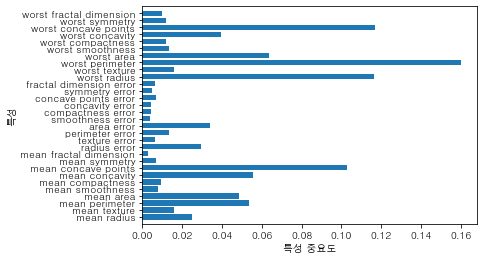

In [49]:
plot_feature_importances_cancer(forest)
#각 트리에서 특성의 중요도 취합
#하나의 트리에서의 특성 중요도보다 신뢰 가능
#단일 결정트리와 비교하여 많은 특성이 0이상의 중요도

# 그레이디언트 부스팅 회귀트리

이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦

다수의 결정 트리 기반 앙상블

회귀/분류 모두에 사용

랜덤성이 없고 사전 가지치기 적용

5이하 깊이의 트리로 메모리 사용이 적고 예측이 빠름

간단한 모델을 다수 연결: 일부에 대해 잘 예측하는 트리(약분류기)를 다수 사용

매개변수 설정(사전 가지치기, 트리 개수)에 민감(매개변수 조정으로 나은 성능 가능)

Learning rate(학습률): 0.0-1.0
 -이전트리의 오차 보정률
 -클수록 보정을 강하게 하여 복잡한 모델
 
n_estimator:큰 값 -> 더 많은 트리, 복잡도 상승, 훈련세트의 실수 보정 기회 상승

멀티클래스
 -n_classes *n_estimators
 -random forest 추천

### 유방암 데이터로 학습

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state =0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))
#기본값인 깊이가 3인 트리 100개와 학습률 0.1
#훈련세트의 정확도가 100% -> 과대적합
#과대적합을 막기 위해 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률 낮춤

훈련 세트 정확도:1.000
테스트 세트 정확도:0.965


In [53]:
cvscores=cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=5:{:.3f}\n".format(cvscores.mean()))

cvscores=cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=10:{:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도 CV=5:0.850

테스트 세트 정확도 CV=10:0.890



In [55]:
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)#트리 최대 깊이를 낮춤 -> 사전 가지치기
gbrt.fit(X_train,y_train)#훈련


print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))
cvscores=cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=5:{:.3f}".format(cvscores.mean()))
cvscores=cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=10:{:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도:0.991
테스트 세트 정확도:0.972
테스트 세트 정확도 CV=5:0.890
테스트 세트 정확도 CV=10:0.870



In [56]:
gbrt=GradientBoostingClassifier(random_state=0, learning_rate=0.01)#학습률 낮춤
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도:{:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(gbrt.score(X_test,y_test)))
cvscores=cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV=5:{:.3f}".format(cvscores.mean()))
cvscores=cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV=10:{:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.965
테스트 세트 정확도 CV=5:0.870
테스트 세트 정확도 CV=10:0.860



### 그레디언트 부스팅 vs 랜덤 포레스트 특성 중요도

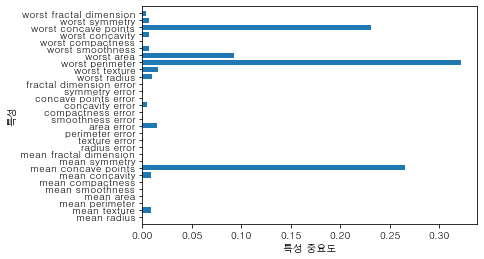

In [58]:
gbrt=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

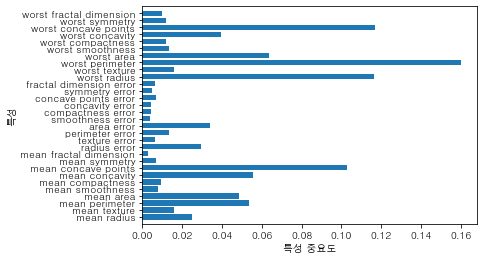

In [59]:
plot_feature_importances_cancer(forest)